## Exercise

1. Load the dataset **`california_housing_train.csv`**.
2. Use the provided model architecture to train the data.
3. Monitor and record both **training loss** and **validation loss** during the training process.
4. Plot the loss curves to visually compare the model’s performance on training and validation data.

### Notes
- Split the dataset into **training** and **validation** sets before training.
- Watch for signs of **overfitting** or **underfitting** in the loss curves.
- Report your final training and validation losses at the end of training.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv('california_housing_train.csv')
x = df.drop(['median_house_value'], axis= 1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.tensor(x_train.values, dtype = torch.float32, device = device)
y_train_tensor = torch.tensor(y_train.values.reshape(-1,1), dtype = torch.float32, device = device)

x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32, device = device)
y_test_tensor = torch.tensor(y_test.values.reshape(-1,1), dtype = torch.float32, device = device)

x_mu = x_train_tensor.mean(axis = 0)
x_std = x_train_tensor.std(axis = 0)
x_train_tensor_scaled = (x_train_tensor - x_mu)/(x_std)

y_mu = y_train_tensor.mean()
y_std = y_train_tensor.std()
y_train_tensor_scaled = (y_train_tensor - y_mu)/(y_std)

x_test_tensor_scaled = (x_test_tensor - x_mu)/(x_std)
y_test_tensor_scaled = (y_test_tensor - y_mu)/(y_std)

In [2]:
from torch import nn

class ManualRegresion(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return x


Epoch 1: train loss = 1.1765588521957397, val loss = 1.1773452758789062
Epoch 500: train loss = 0.6364377737045288, val loss = 0.6313725113868713
Epoch 1000: train loss = 0.44647976756095886, val loss = 0.43595173954963684
Epoch 1500: train loss = 0.3688179552555084, val loss = 0.35629552602767944
Epoch 2000: train loss = 0.3522011935710907, val loss = 0.3397153913974762
Epoch 2500: train loss = 0.3409717381000519, val loss = 0.32952553033828735
Epoch 3000: train loss = 0.3319864869117737, val loss = 0.32177790999412537
Epoch 3500: train loss = 0.32538560032844543, val loss = 0.31649619340896606
Epoch 4000: train loss = 0.3210557699203491, val loss = 0.31332817673683167
Epoch 4500: train loss = 0.31800544261932373, val loss = 0.3109425902366638
Epoch 5000: train loss = 0.3155737519264221, val loss = 0.3090827465057373
Epoch 5500: train loss = 0.3133687376976013, val loss = 0.30749374628067017
Epoch 6000: train loss = 0.31129080057144165, val loss = 0.3059796392917633
Epoch 6500: train 

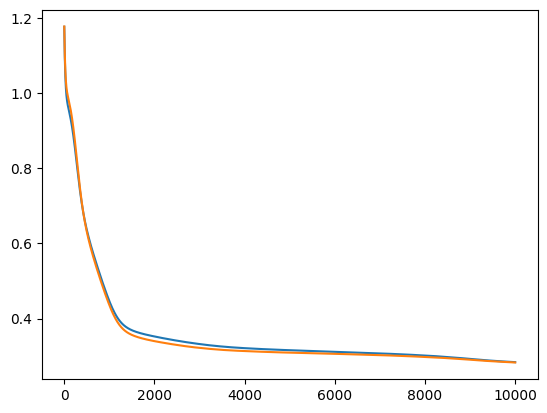

In [3]:
from torch import optim
import matplotlib.pyplot as plt

torch.manual_seed(42)
lr = .01
input_dim = x_train_tensor.shape[1]
model = ManualRegresion(input_dim).to(device)
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  y_pred = model(x_train_tensor_scaled)
  loss = loss_fn(y_train_tensor_scaled, y_pred)
  loss.backward()
  optimizer.step()
  train_losses.append(loss.detach().cpu().item())

  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor_scaled)
    test_loss = loss_fn(y_test_tensor_scaled, y_pred)
    val_losses.append(test_loss.cpu().item())


  if (epoch + 1) % 500 == 0 or epoch == 0:
    print(f'Epoch {epoch + 1}: train loss = {loss.detach().cpu().item()}, val loss = {test_loss.cpu().item()}')

plt.plot(range(n_epochs), train_losses)
plt.plot(range(n_epochs), val_losses)
plt.show()

### Exercise: Build a Deep Model to Demonstrate Overfitting

**Instructions:**

You will create a deep fully-connected neural network for a regression task.  
The architecture will be intentionally large compared to the dataset size so that overfitting can be observed.

**Model Architecture:**
- **Input layer**: number of neurons equal to the number of input features (`input_dim`).
- **Hidden Layer 1**: 256 neurons, ReLU activation.
- **Hidden Layer 2**: 128 neurons, ReLU activation.
- **Hidden Layer 3**: 64 neurons, ReLU activation.
- **Hidden Layer 4**: 32 neurons, ReLU activation.
- **Hidden Layer 5**: 16 neurons, ReLU activation.
- **Output Layer**: 1 neuron (no activation).

**Steps:**
1. Implement the above architecture using `torch.nn.Module`.
2. Train the model **only on the first 100 samples** of the training dataset (`X_train`, `y_train`).
3. Train for a sufficient number of epochs (e.g., 5000) to let the model memorize the training data.
4. Record both **training loss** and **validation loss** over epochs.
5. Plot both curves to observe:
   - Training loss decreasing close to zero.
   - Validation loss increasing after some point (a clear sign of overfitting).

**Expected Output:**
- A plot with two curves:  
  - **Training loss** continuously decreasing.  
  - **Validation loss** starting low but increasing after some epochs.
- Clear evidence that the model has memorized the small training set instead of generalizing.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv('california_housing_train.csv')
x = df.drop(['median_house_value'], axis= 1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train = x_train[:100]
y_train = y_train[:100]

x_train_tensor = torch.tensor(x_train.values, dtype = torch.float32, device = device)
y_train_tensor = torch.tensor(y_train.values.reshape(-1,1), dtype = torch.float32, device = device)

x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32, device = device)
y_test_tensor = torch.tensor(y_test.values.reshape(-1,1), dtype = torch.float32, device = device)

x_mu = x_train_tensor.mean(axis = 0)
x_std = x_train_tensor.std(axis = 0)
x_train_tensor_scaled = (x_train_tensor - x_mu)/(x_std)

y_mu = y_train_tensor.mean()
y_std = y_train_tensor.std()
y_train_tensor_scaled = (y_train_tensor - y_mu)/(y_std)

x_test_tensor_scaled = (x_test_tensor - x_mu)/(x_std)
y_test_tensor_scaled = (y_test_tensor - y_mu)/(y_std)

In [6]:
from torch import nn

class ManualRegresion(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,32)
    self.fc5 = nn.Linear(32,16)
    self.fc6 = nn.Linear(16,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    x = self.relu(x)
    x = self.fc5(x)
    x = self.relu(x)
    x = self.fc6(x)
    return x


Epoch 1: train loss = 1.0202946662902832, val loss = 1.0805132389068604
Epoch 500: train loss = 0.5551572442054749, val loss = 0.6630881428718567
Epoch 1000: train loss = 0.08678176254034042, val loss = 0.4362576901912689
Epoch 1500: train loss = 0.046609073877334595, val loss = 0.43103286623954773
Epoch 2000: train loss = 0.025586441159248352, val loss = 0.4433762729167938
Epoch 2500: train loss = 0.019431937485933304, val loss = 0.4498579800128937
Epoch 3000: train loss = 0.024677559733390808, val loss = 0.4488532841205597
Epoch 3500: train loss = 0.009160631336271763, val loss = 0.45914649963378906
Epoch 4000: train loss = 0.018830733373761177, val loss = 0.4536783695220947
Epoch 4500: train loss = 0.007156621664762497, val loss = 0.45977267622947693
Epoch 5000: train loss = 0.004296907689422369, val loss = 0.4675157368183136


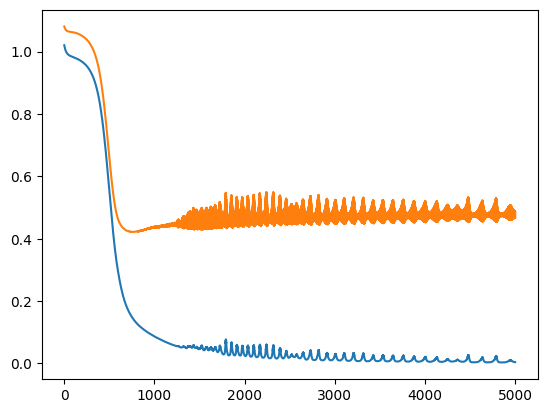

In [7]:
from torch import optim
import matplotlib.pyplot as plt

torch.manual_seed(42)
lr = .01
input_dim = x_train_tensor.shape[1]
model = ManualRegresion(input_dim).to(device)
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 5000
train_losses = []
val_losses = []

for epoch in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  y_pred = model(x_train_tensor_scaled)
  loss = loss_fn(y_train_tensor_scaled, y_pred)
  loss.backward()
  optimizer.step()
  train_losses.append(loss.detach().cpu().item())

  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor_scaled)
    test_loss = loss_fn(y_test_tensor_scaled, y_pred)
    val_losses.append(test_loss.cpu().item())


  if (epoch + 1) % 500 == 0 or epoch == 0:
    print(f'Epoch {epoch + 1}: train loss = {loss.detach().cpu().item()}, val loss = {test_loss.cpu().item()}')

plt.plot(range(n_epochs), train_losses)
plt.plot(range(n_epochs), val_losses)
plt.show()

Epoch 1: train loss = 1.0192121267318726, val loss = 1.0677073001861572
Epoch 1000: train loss = 0.10218165814876556, val loss = 0.4074100852012634
Epoch 2000: train loss = 0.03848112374544144, val loss = 0.4580661654472351
Epoch 3000: train loss = 0.025548003613948822, val loss = 0.4744420051574707
Epoch 4000: train loss = 0.006148732732981443, val loss = 0.449287086725235
Epoch 5000: train loss = 0.004070095252245665, val loss = 0.45215904712677
Epoch 6000: train loss = 0.002411626512184739, val loss = 0.44633805751800537
Epoch 7000: train loss = 0.002151023829355836, val loss = 0.4512344300746918
Epoch 8000: train loss = 0.0015573882265016437, val loss = 0.4475099742412567
Epoch 9000: train loss = 0.00804935209453106, val loss = 0.47185030579566956
Epoch 10000: train loss = 0.00188076205085963, val loss = 0.4569385349750519


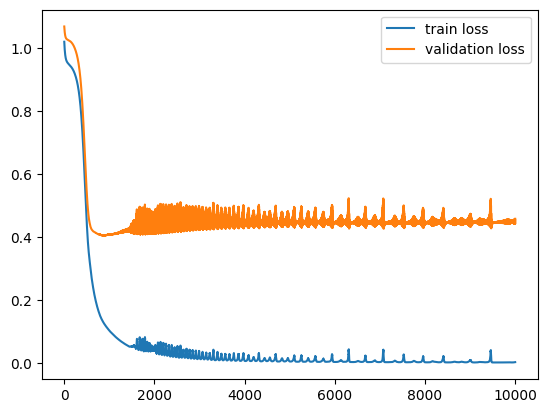

### Exercise: Build a Simple Model to Demonstrate Underfitting

**Instructions:**

You will create an extremely simple neural network for a regression task in order to observe **underfitting**.

**Model Architecture:**
- **Input Layer**: number of neurons equal to the number of input features (`input_dim`).
- **Output Layer**: 1 neuron (no hidden layers, no activation function).

**Steps:**
1. Implement the above architecture using `torch.nn.Module`.
2. Train the model on the **entire training dataset** (no sample limitation).
3. Use the same training procedure as before (same optimizer and loss function), but **train for fewer epochs** than in the previous exercises.
4. Record both **training loss** and **validation loss** over epochs.
5. Plot both curves to observe:
   - Training loss remains relatively high.
   - Validation loss also remains high.
   - Both indicate that the model is too simple to capture the complexity of the data (underfitting).

**Expected Output:**
- A loss plot showing minimal improvement over epochs.
- Similar loss values for both training and validation sets, but both being higher than desired.



In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv('california_housing_train.csv')
x = df.drop(['median_house_value'], axis= 1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.tensor(x_train.values, dtype = torch.float32, device = device)
y_train_tensor = torch.tensor(y_train.values.reshape(-1,1), dtype = torch.float32, device = device)

x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32, device = device)
y_test_tensor = torch.tensor(y_test.values.reshape(-1,1), dtype = torch.float32, device = device)

x_mu = x_train_tensor.mean(axis = 0)
x_std = x_train_tensor.std(axis = 0)
x_train_tensor_scaled = (x_train_tensor - x_mu)/(x_std)

y_mu = y_train_tensor.mean()
y_std = y_train_tensor.std()
y_train_tensor_scaled = (y_train_tensor - y_mu)/(y_std)

x_test_tensor_scaled = (x_test_tensor - x_mu)/(x_std)
y_test_tensor_scaled = (y_test_tensor - y_mu)/(y_std)

In [32]:
from torch import nn

class ManualRegresion(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 1)

  def forward(self, x):
    return self.fc1(x)

Epoch 1: train loss = 1.0149917602539062, val loss = 1.0031282901763916
Epoch 10: train loss = 0.8790621161460876, val loss = 0.8707137703895569
Epoch 20: train loss = 0.7788597345352173, val loss = 0.7709885835647583
Epoch 30: train loss = 0.709770917892456, val loss = 0.7012030482292175
Epoch 40: train loss = 0.6606576442718506, val loss = 0.6510108709335327
Epoch 50: train loss = 0.6249971985816956, val loss = 0.6141797304153442


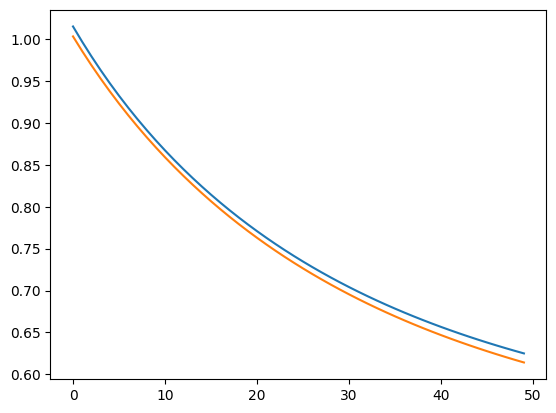

In [33]:
from torch import optim
import matplotlib.pyplot as plt

torch.manual_seed(42)
lr = .01
input_dim = x_train_tensor.shape[1]
model = ManualRegresion(input_dim).to(device)
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 50
train_losses = []
val_losses = []

for epoch in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  y_pred = model(x_train_tensor_scaled)
  loss = loss_fn(y_train_tensor_scaled, y_pred)
  loss.backward()
  optimizer.step()
  train_losses.append(loss.detach().cpu().item())

  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor_scaled)
    test_loss = loss_fn(y_test_tensor_scaled, y_pred)
    val_losses.append(test_loss.cpu().item())


  if (epoch + 1) % 10 == 0 or epoch == 0:
    print(f'Epoch {epoch + 1}: train loss = {loss.detach().cpu().item()}, val loss = {test_loss.cpu().item()}')

plt.plot(range(n_epochs), train_losses)
plt.plot(range(n_epochs), val_losses)
plt.show()

Epoch 1: train loss = 0.697185218334198, val loss = 0.6835914850234985
Epoch 10: train loss = 0.6516306400299072, val loss = 0.6388094425201416
Epoch 20: train loss = 0.6174384951591492, val loss = 0.6043758392333984
Epoch 30: train loss = 0.5927644968032837, val loss = 0.5791386961936951
Epoch 40: train loss = 0.5741038918495178, val loss = 0.559846043586731
Epoch 50: train loss = 0.5595171451568604, val loss = 0.5446444749832153


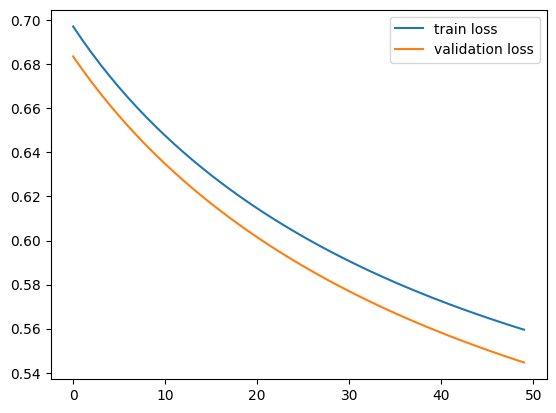